In [102]:
import random 
class sentiment():
    POSITIVE = 'POSITIVE'
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'


class Review() :
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return sentiment.NEGATIVE
        elif self.score == 3:
            return sentiment.NEUTRAL
        else :
            return sentiment.POSITIVE

class ReviewContainer():
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
#     def even_distribution(self):
#         positive = list(filter(lambda x: x.sentiment == sentiment.POSITIVE, self.reviews))
#         negative = list(filter(lambda x: x.sentiment ==sentiment.NEGATIVE, self.reviews))
#         positive_shrunk = positive[:len(negative)]
#         self.reviews = positive_shrunk + negative
#         random.shuffle(self.reviews)

In [103]:
import json

reviews = []
filename = './Books_small.json'
with open(filename ) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [104]:
reviews[5].text

'Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!'

In [105]:
reviews[5].score

4.0

In [106]:
reviews[789].sentiment

'POSITIVE'

In [107]:
len(reviews)

1000

In [108]:
from sklearn.model_selection import train_test_split
training, test  = train_test_split(reviews, test_size = 0.33, random_state = 42)

training_container = ReviewContainer(training)
test_container = ReviewContainer(test)



In [109]:
print(len(training))
print(len(test))

670
330


In [110]:
# independent variable  = text
# dependent variable = sentiment
train_x = training_container.get_text()
train_y = training_container.get_sentiment()


test_x = test_container.get_text()
test_y = test_container.get_sentiment()

In [111]:
len(train_x)

670

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

train_x_vector = vectorizer.fit_transform(train_x)

test_x_vector = vectorizer.transform(test_x)
# for further explanation
# visit  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [113]:
#print(train_x_vector)

In [114]:
#print(train_y)

In [115]:
#print(test_x_vector)

In [116]:
#print(train_y)

### Support vector machine

In [117]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear')
clf_svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [118]:
clf_svc.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### decision tree 


In [119]:
#
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [120]:
clf_dtc.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### naive bayes 

In [121]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [122]:
clf_gnb.predict(test_x_vector[0].toarray())

array(['POSITIVE'], dtype='<U8')

### logistic regression 

In [123]:
from sklearn.linear_model import LogisticRegression
clf_lgr = LogisticRegression()
clf_lgr.fit(train_x_vector , train_y)

C:\Users\Bharati\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
clf_lgr.predict(test_x_vector[0])

array(['POSITIVE'], dtype='<U8')

### Evaluation

## mean accuracy 

In [125]:
#svm
m1 = clf_svc.score(test_x_vector, test_y)
print(m1)

0.8242424242424242


In [126]:
#decision tree classifier
m2 = clf_dtc.score(test_x_vector, test_y)
print(m2)

0.7363636363636363


In [127]:
# naive bayes 
m3 = clf_gnb.score(test_x_vector.toarray(), test_y)
print(m3)

0.8121212121212121


In [128]:
# logistic regression
m4 = clf_lgr.score(test_x_vector, test_y)
print(m4)

0.8303030303030303


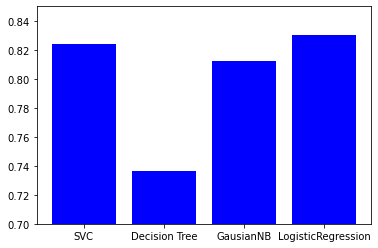

In [129]:
y = [m1, m2,m3,m4]
x = ['SVC', "Decision Tree", 'GausianNB','LogisticRegression']

import matplotlib.pyplot as plt
plt.ylim(0.70, 0.85)
plt.bar(x,y, color = 'blue')
plt.show()



##  F1 score

In [130]:
# f1 score of each model
from sklearn.metrics import f1_score
svm_f1 = f1_score(test_y, clf_svc.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
dtc_f1 = f1_score(test_y, clf_dtc.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
gnb_f1 = f1_score(test_y, clf_gnb.predict(test_x_vector.toarray()), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])
lgr_f1 = f1_score(test_y, clf_lgr.predict(test_x_vector), average=None, labels=[sentiment.POSITIVE,sentiment.NEGATIVE, sentiment.NEUTRAL ])

print(svm_f1, dtc_f1, gnb_f1,lgr_f1, sep='\n')

[0.91319444 0.22222222 0.21052632]
[0.85409253 0.         0.09375   ]
[0.89678511 0.09090909 0.08510638]
[0.91370558 0.1        0.12244898]


No handles with labels found to put in legend.


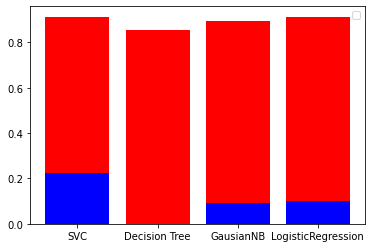

In [131]:
f1_list_pos = [svm_f1[0], dtc_f1[0], gnb_f1[0], lgr_f1[0]]
f1_list_neg = [svm_f1[1], dtc_f1[1], gnb_f1[1], lgr_f1[1]]

plt.bar(x, f1_list_pos, color = 'r')
plt.bar(x, f1_list_neg, color = 'b')

plt.legend()
plt.show()